In [1]:
# Read libraries and data
import torch
import pandas as pd
import requests
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Replace with the URL you copied
url = 'https://raw.githubusercontent.com/jvilchesf/Learning/main/Andrej_karpathy_videos/Makemore/names.txt'

response = requests.get(url)
words = response.text.splitlines()

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /jvilchesf/Learning/main/Andrej_karpathy_videos/Makemore/names.txt (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x123cbd650>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [ ]:
#Dictionary to convert from index to character
alphabet = sorted(set("".join(words)))
itos = {idx:ch for idx,ch in enumerate(alphabet)}
stoi = {ch:idx for idx,ch in enumerate(alphabet)}

itos[26] = '.'
stoi['.'] = 26

In [ ]:
#Creating the dataset
block_size = 3
context = []
X , Y = [], []
for w in words: 

    context = block_size * [0] 

    for i in w + '.':
        idx = stoi[i]
        X.append(context)
        Y.append(idx)
        #print(f"{context} -> {i}")
        context = context[1:] + [idx]
    #print("-----------------")

X = torch.tensor(X)    
Y = torch.tensor(Y)    

In [ ]:
#Create train, validation and test dataset
n1 = int(0.8 * X.shape[0])
n2 = int(0.9 * X.shape[0])
Xtr, Xdev, Xts = torch.tensor_split(X, (n1, n2), dim=0)
Ytr, Ydev, Yts = torch.tensor_split(Y, (n1, n2), dim=0)

In [ ]:
#Define the model variables W1, W2, b1, b2, C, parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g, requires_grad=True)
W1 = torch.randn((6,100), generator = g, requires_grad = True)
b1 = torch.randn(100, generator = g, requires_grad=True)
W2 = torch.randn((100,27), generator = g, requires_grad = True)
b2 = torch.randn(27, generator = g, requires_grad=True)
parameters = [C, W1, b1, W2, b2]

In [ ]:
lre = torch.linspace(-3, 0, steps=1000)
lrs = 10**lre

In [ ]:
lossi = []
gradi = []

for i in range(10000):

    #batches
    idx = torch.randint(0, Xtr.shape[0], (32,))

    #Forward
    #Embedding the input
    emb = C[Xtr[idx]]
    #multiplying the embedding matrix by the first weight matrix
    #I applied view to make the matrix multiplication possible
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    #Multiply the second layer
    logits = h @ W2 + b2

    #Softmax
    #counts = logits.exp()
    #normalization
    #prob = counts / counts.sum(1, keepdim = True)
    #loss
    #loss = -prob[torch.arange(32), Y].log().mean()

    loss = F.cross_entropy(logits,Ytr[idx])

    #Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update the parameters
    for p in parameters:
        p.data -= p.grad * grad[i]
    
    gradi.append(grad[i])
    lossi.append(loss.item())

print(loss)

tensor(4.0457, grad_fn=<NllLossBackward0>)


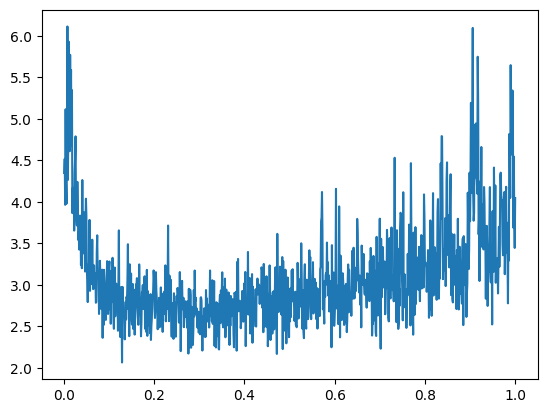

In [ ]:
plt.plot(gradi, lossi)

In [ ]:
#batches
#Forward
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
#Multiply the second layer
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)

print(loss)

#Backward pass
for p in parameters:
    p.grad = None
loss.backward()

#update the parameters
for p in parameters:
    p.data -= p.grad * 0.01

tensor(5.4175, grad_fn=<NllLossBackward0>)
